In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv(r"C:\Users\TUF\Desktop\dataset\annex1.csv")
df.head(10)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables
5,102900005115779,Yunnan Shengcai,1011010101,Flower/Leaf Vegetables
6,102900005115786,Zhuyecai,1011010101,Flower/Leaf Vegetables
7,102900005115793,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
8,102900005115816,Nanguajian,1011010101,Flower/Leaf Vegetables
9,102900005115823,Shanghaiqing,1011010101,Flower/Leaf Vegetables


In [47]:
df.dtypes

Item Code         int64
Item Name        object
Category Code     int64
Category Name    object
dtype: object

In [48]:
df.describe()

,Item Code,Category Code
count,2.510000e+02,2.510000e+02
mean,1.031908e+14,1.011010e+09
std,1.048400e+12,2.915469e+02
min,1.029000e+14,1.011010e+09
25%,1.029000e+14,1.011010e+09
50%,1.029000e+14,1.011011e+09
75%,1.029000e+14,1.011011e+09
max,1.069740e+14,1.011011e+09


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [50]:
df.isnull().sum() #Apparently,there are no null data

Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

In [51]:
# Convert text data to lowercase in the process of standardisation 
df['Item Name'] = df['Item Name'].str.lower()
df['Category Name'] = df['Category Name'].str.lower()
df.tail(10)

,Item Code,Item Name,Category Code,Category Name
241,106949711300259,needle mushroom (box),1011010801,edible mushroom
242,106956146480197,the white mushroom (2),1011010801,edible mushroom
243,106956146480203,the crab flavor mushroom (2),1011010801,edible mushroom
244,106957634300010,the white mushroom (box),1011010801,edible mushroom
245,106957634300058,the crab flavor mushroom (box),1011010801,edible mushroom
246,106958851400125,haixian mushroom (bag) (4),1011010801,edible mushroom
247,106971533450003,haixian mushroom (bunch),1011010801,edible mushroom
248,106971533455008,haixian mushroom (bag) (3),1011010801,edible mushroom
249,106973223300667,chinese caterpillar fungus flowers (box) (2),1011010801,edible mushroom
250,106973990980123,hfyg haixian mushroom (bunch),1011010801,edible mushroom


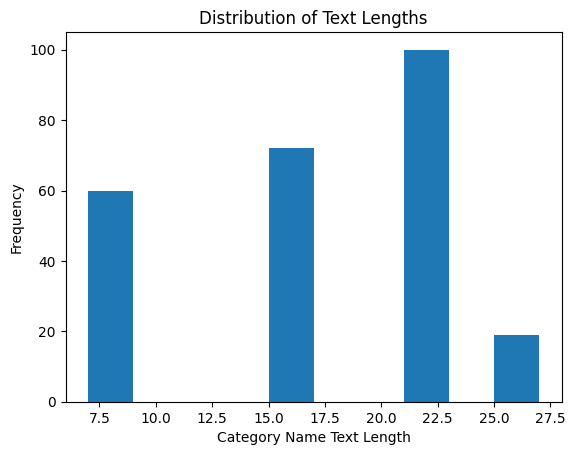

In [52]:
from matplotlib import pyplot as plt

#Checking for unusually long or short text . Did this simply , might remove it later.
df['text_length'] = df['Category Name'].apply(len)

plt.hist(df['text_length'], bins='auto')
plt.xlabel('Category Name Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

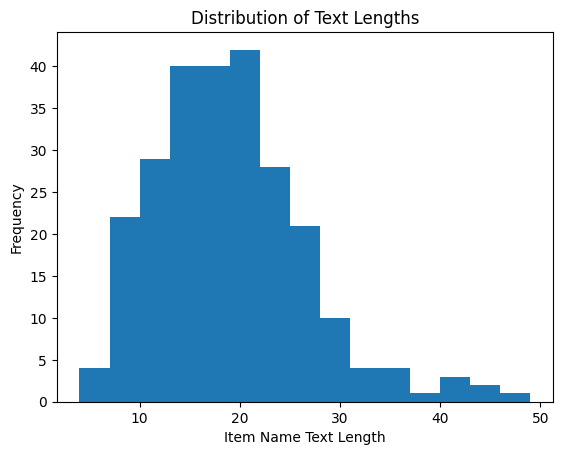

In [53]:
#Checking for unusually long or short text .Did this simply , might remove it later.
df['text_length'] = df['Item Name'].apply(len)

plt.hist(df['text_length'], bins='auto')
plt.xlabel('Item Name Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

In [54]:
#Removing Non-breaking space characters
df['Category Name'] = df['Category Name'].str.replace('\xa0', '') 
df.head(15)

,Item Code,Item Name,Category Code,Category Name,text_length
0,102900005115168,niushou shengcai,1011010101,flower/leafvegetables,16
1,102900005115199,sichuan red cedar,1011010101,flower/leafvegetables,17
2,102900005115625,local xiaomao cabbage,1011010101,flower/leafvegetables,21
3,102900005115748,white caitai,1011010101,flower/leafvegetables,12
4,102900005115762,amaranth,1011010101,flower/leafvegetables,8
5,102900005115779,yunnan shengcai,1011010101,flower/leafvegetables,15
6,102900005115786,zhuyecai,1011010101,flower/leafvegetables,8
7,102900005115793,chinese cabbage,1011010101,flower/leafvegetables,15
8,102900005115816,nanguajian,1011010101,flower/leafvegetables,10
9,102900005115823,shanghaiqing,1011010101,flower/leafvegetables,12


In [55]:
item_name_counts = df['Item Name'].value_counts()
item_name_counts


Item Name
chinese caterpillar fungus flowers (bag)    2
broccoli                                    2
apricot bao mushroom (bag)                  2
chinese cabbage                             2
fruit pepper (bag)                          1
                                           ..
xianzongye (bag) (1)                        1
foreign garland chrysanthemum  (bag)        1
longyacai                                   1
yellow baicai (1)                           1
hfyg haixian mushroom (bunch)               1
Name: count, Length: 247, dtype: int64

In [56]:
#space for bar graph :item vs frequency

In [57]:
unique_items = df['Item Name'].unique()

# Number of customers
num_customers = len(df) // 2  # Assuming each customer buys at least two items

# Generate random customer IDs
customer_ids = np.random.randint(10000, 99999, size=num_customers)

# Duplicate customer IDs to ensure each customer buys at least two items
customer_ids = np.repeat(customer_ids, np.random.randint(2, 5, size=num_customers))

# Shuffle the customer IDs to randomize the association with items
np.random.shuffle(customer_ids)

# Assign customer IDs and items to the DataFrame
customer_item_association = np.random.choice(unique_items, len(df))
df['Customer ID'] = np.tile(customer_ids, len(unique_items) // 2)[:len(df)]
df['Item Name'] = customer_item_association

# Display the resulting DataFrame
print(df.head())


         Item Code                  Item Name  Category Code  \
0  102900005115168  yunnan leaf lettuce (bag)     1011010101   
1  102900005115199         purple cabbage (2)     1011010101   
2  102900005115625                   zhuyecai     1011010101   
3  102900005115748      local xiaomao cabbage     1011010101   
4  102900005115762              radish leaves     1011010101   

           Category Name  text_length  Customer ID  
0  flower/leafvegetables           16        92540  
1  flower/leafvegetables           17        10932  
2  flower/leafvegetables           21        59768  
3  flower/leafvegetables           12        52606  
4  flower/leafvegetables            8        81911  


In [58]:
df

,Item Code,Item Name,Category Code,Category Name,text_length,Customer ID
0,102900005115168,yunnan leaf lettuce (bag),1011010101,flower/leafvegetables,16,92540
1,102900005115199,purple cabbage (2),1011010101,flower/leafvegetables,17,10932
2,102900005115625,zhuyecai,1011010101,flower/leafvegetables,21,59768
3,102900005115748,local xiaomao cabbage,1011010101,flower/leafvegetables,12,52606
4,102900005115762,radish leaves,1011010101,flower/leafvegetables,8,81911
...,...,...,...,...,...,...
246,106958851400125,red pepper (bag),1011010801,edible mushroom,26,45960
247,106971533450003,millet pepper,1011010801,edible mushroom,24,48559
248,106971533455008,spinach (bag),1011010801,edible mushroom,26,85187
249,106973223300667,needle mushroom (bag),1011010801,edible mushroom,44,59768


In [59]:
average_items_per_customer = df.groupby('Customer ID')['Item Name'].count().mean()

print(f"Average number of items bought by each customer: {average_items_per_customer}")


Average number of items bought by each customer: 2.163793103448276


In [60]:
print("hello")

hello
